In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
df = pd.read_csv('../Datasets/placements.csv')
print(df.shape)
df.head()

(100, 3)


,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [173]:
print("cgpa \n", "min : ", min(df.iloc[:,0]), "\n max :", max(df.iloc[:,0]))
print("resume_score \n", "min : ", min(df.iloc[:,1]), "\n max :", max(df.iloc[:,1]))
np.unique(df.iloc[:,2])

cgpa 
 min :  5.27 
 max : 9.4
resume_score 
 min :  4.95 
 max : 9.06


array([0, 1])

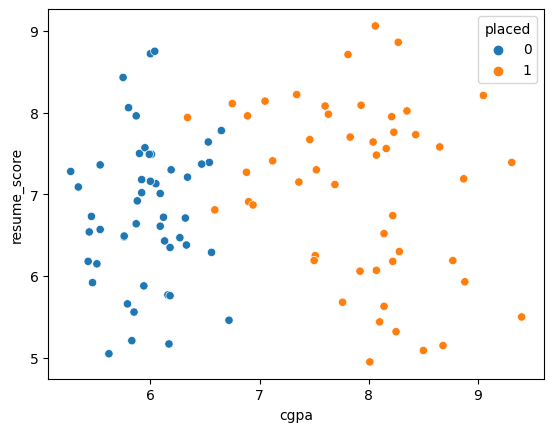

In [174]:
sns.scatterplot(df, x='cgpa', y='resume_score', hue='placed')
plt.show()

In [175]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [176]:
from sklearn.linear_model import Perceptron
# has only 100 datapoints. It may not e enough to make a perceptron learn
model = Perceptron(max_iter = 100)
model.fit(X, y)

Perceptron(max_iter=100)

In [177]:
print(model.coef_)
print(model.intercept_)

[[ 40.26 -36.  ]]
[-25.]


/Users/vivektyagi/miniconda3/envs/envDS/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


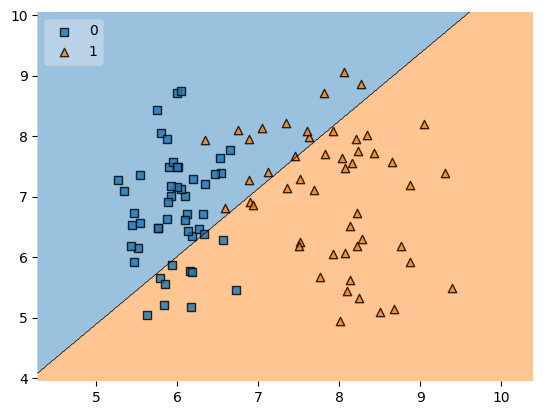

In [178]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf=model,legend=2)
plt.show()

In [179]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, 
    n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41,
    hypercube=False, class_sep=10)

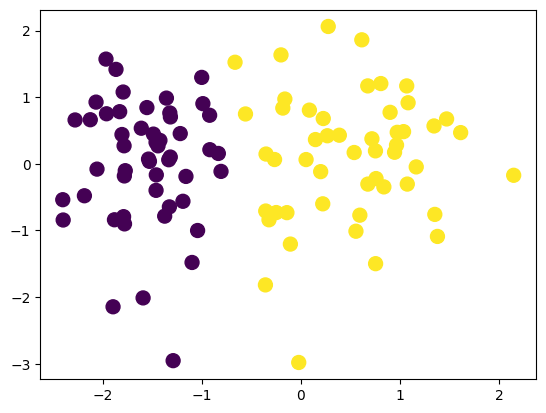

In [180]:
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.show()

In [181]:
#define a step function
def step(z):
    return z>=0

# function for rudimentary perceptron logic
def myperceptron(X, y, lr=0.1, iterations=1000):
    # insert bias column into input data for biased term and simplified matrix opeartions
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    for iter in range(iterations):
        # select a random data point
        pt = np.random.randint(0,100)
        y_hat = step(np.dot(X[iter], weights))
        weights = weights + lr * (y[iter] - y_hat)*X[iter]

    return weights[0], weights[1:]

In [182]:
intercept, coefficients = myperceptron(X, y, iterations=100)
print("intercept : ", intercept)
print("coefficients", coefficients)

intercept :  0.9
coefficients [1.3878435  0.10597147]


In [183]:
# convert line into simplified equation
m = - (coefficients[0]/coefficients[1])
b = - (intercept/coefficients[1])
print(m, b)

-13.096388513261017 -8.492852183439245


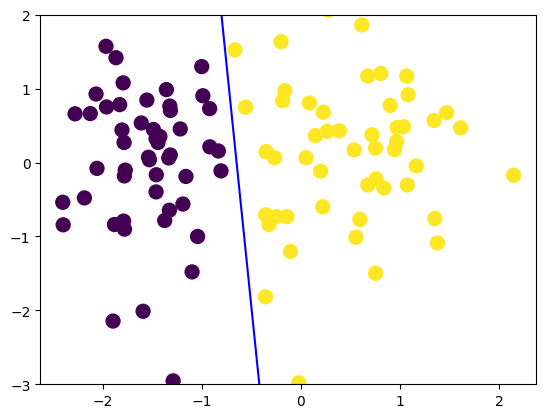

In [186]:
lin_x = np.linspace(-1.5,2,100)
lin_y = m*lin_x + b

plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.plot(lin_x, lin_y, color='b')
plt.ylim(-3,2)
plt.show()